In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import rescomp

import matplotlib.pyplot as plt
import os

# new imports:
from rescomp.alternative_tests import simulation_tests as simt

# Conduct experiment:
- compare divergence
- compare Largest LE qr
- compare divergence trajectory of qr algorithm

## Parameters used for divergence and LLE qr:

In [2]:
prepath = "C:/Users\Dennis\Documents\FILES&INFO\WISSEN\STUDIUM\Master LMU\Masterthesis\LyapunovExponentsSimulations"
exp_name_both = "L96_31_01_2022"

In [3]:
# create the "create_sim_func" func:
def create_sim_func(parameters):
    sys_flag = "lorenz_96"
    def data_creation_function(time_steps, dt, starting_point):
        return rescomp.simulations.simulate_trajectory(sys_flag, dt, time_steps, starting_point)
    return data_creation_function
    
# create the "create_sp_func" starting point func:
def create_sp_func(parameters, Nens):
    dims = parameters["dims"]
    seed = parameters["seed"]
    scale = parameters["scale"]
    randmode = parameters["randmode"]
    np.random.seed(seed)
    if randmode == "normal":
        starting_points = np.random.randn(Nens, dims)
    elif randmode == "uniform":
        starting_points = np.random.uniform(size=(Nens, dims)) - 0.5
    return starting_points*scale

create_sim_func_keys = []
create_sp_func_keys = ["dims", "seed", "scale", "randmode"]

## Exp1: Compare Divergence:

In [26]:
# create the parameter dict to define the experiment:
parameter_dict = {
    "dims": [20, 50, 100],
    "seed": 31,
    "scale": [3 ],
    "randmode": ["uniform"],
    
    "dt": [0.1],
    "tau": 100,
    "T": 100, 
    
    "eps": [1e-6]
}
# define Ndims and Nens
Ndims = 1
Nens = 30

# define saving:
save = True

div_name = "_div1"
exp_name_div = exp_name_both + div_name

# other parameters:
get_info = True

out_div = simt.compare_simulations_div(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name_div, Nens=Nens, Ndims=Ndims
                         , get_info=get_info)

--------------------
create_sim_func_keys []
create_sp_func_keys ['dims', 'seed', 'scale', 'randmode']
--------------------
--------------------
PARAMETERS: 
dims [20, 50, 100]
seed 31
scale 3
randmode uniform
dt 0.1
tau 100
T 100
eps 1e-06
--------------------
STARTING CALCULATIONS (3): 
....
CALC: 1/3
{'dims': 20, 'seed': 31, 'scale': 3, 'randmode': 'uniform'}, dt: 0.1, tau: 100, T: 100, eps: 1e-06
N_ens: 1/30
timestep 1000/1000
N_ens: 2/30
timestep 1000/1000
N_ens: 3/30
timestep 1000/1000
N_ens: 4/30
timestep 1000/1000
N_ens: 5/30
timestep 1000/1000
N_ens: 6/30
timestep 1000/1000
N_ens: 7/30
timestep 1000/1000
N_ens: 8/30
timestep 1000/1000
N_ens: 9/30
timestep 1000/1000
N_ens: 10/30
timestep 1000/1000
N_ens: 11/30
timestep 1000/1000
N_ens: 12/30
timestep 1000/1000
N_ens: 13/30
timestep 1000/1000
N_ens: 14/30
timestep 1000/1000
N_ens: 15/30
timestep 1000/1000
N_ens: 16/30
timestep 1000/1000
N_ens: 17/30
timestep 1000/1000
N_ens: 18/30
timestep 1000/1000
N_ens: 19/30
timestep 1000/10

## Exp2: LLE qr and trajectory divergence:

In [10]:
# create the parameter dict to define the experiment:
parameter_dict = {
    "dims": [20, 50, 100],
    "seed": 31,
    "scale": [3 ],
    "randmode": ["uniform"],
    
    "dt": [0.1],
    "tau": 100,
    "T": 10, 
    
    "eps": [1e-6],
    "Nqr": 10,
}
# define Nle and Nens
Nle = 1
Nens = 15

# return trajectory div:
traj_div=True

# define saving:
save = True
qr_name = "_qr1"
exp_name_qr = exp_name_both + qr_name

# other parameters:
get_info = True

out_qr = simt.compare_simulations_leqr(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name_qr, Nens=Nens, Nle=Nle
                    , get_info=get_info, traj_div=True)

--------------------
create_sim_func_keys []
create_sp_func_keys ['dims', 'seed', 'scale', 'randmode']
--------------------
--------------------
PARAMETERS: 
dims [20, 50, 100]
seed 31
scale 3
randmode uniform
dt 0.1
tau 100
T 10
eps 1e-06
Nqr 10
--------------------
STARTING CALCULATIONS (3): 
....
CALC: 1/3
{'dims': 20, 'seed': 31, 'scale': 3, 'randmode': 'uniform'}, dt: 0.1, tau: 100, T: 10, eps: 1e-06, Nqr: 10
N_ens: 1/15
N_ens: 2/15
N_ens: 3/15
N_ens: 4/15
N_ens: 5/15
N_ens: 6/15
N_ens: 7/15
N_ens: 8/15
N_ens: 9/15
N_ens: 10/15
N_ens: 11/15
N_ens: 12/15
N_ens: 13/15
N_ens: 14/15
N_ens: 15/15
....
CALC: 2/3
{'dims': 50, 'seed': 31, 'scale': 3, 'randmode': 'uniform'}, dt: 0.1, tau: 100, T: 10, eps: 1e-06, Nqr: 10
N_ens: 1/15
N_ens: 2/15
N_ens: 3/15
N_ens: 4/15
N_ens: 5/15
N_ens: 6/15
N_ens: 7/15
N_ens: 8/15
N_ens: 9/15
N_ens: 10/15
N_ens: 11/15
N_ens: 12/15
N_ens: 13/15
N_ens: 14/15
N_ens: 15/15
....
CALC: 3/3
{'dims': 100, 'seed': 31, 'scale': 3, 'randmode': 'uniform'}, dt: 0.1, ta

# Plotting:

### Plot results div:

lines: 3, cols: 1, rows: 1
x_steps:  1001
T:  100
x_steps:  1001
T:  100
x_steps:  1001
T:  100


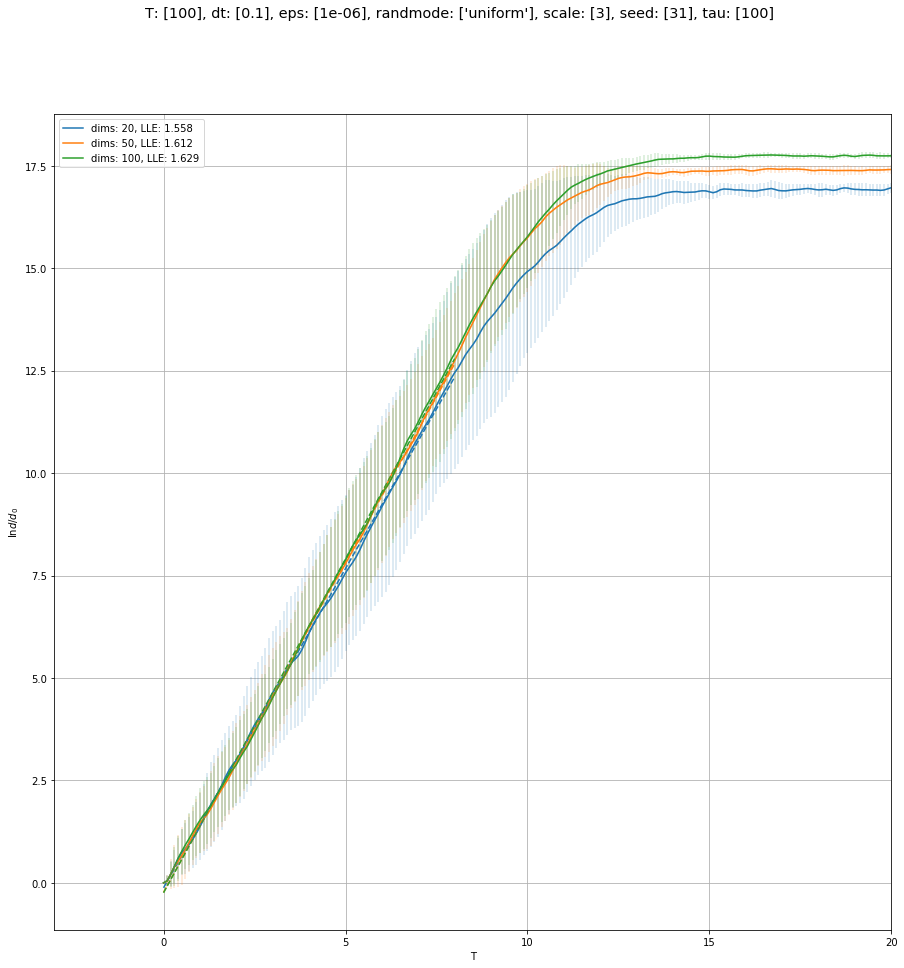

In [28]:
plot_func = simt.plot_div_file

zs = ["dims"]
xs = []
ys = []

# simt.plot_div_file kwargs
mean_axs = "all"
show_error = 1
dim_index = None
ens_index = None

include_fit = 1
t_min = 0
t_max = 8

include_fit_qr = 0
t_min_qr = 0
t_max_qr = 1

subfigsize = (15, 15)
xlims = (-3, 20) # (0,10)
ylims = None # (-1, 10)

simt.plot_experiment(plot_func, prepath, exp_name_div, zs=zs, xs=xs, ys=ys, subfigsize=subfigsize, xlims=xlims,
                     ylims=ylims,
                     mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index, 
                t_min=t_min, t_max=t_max, include_fit_qr=include_fit_qr, t_min_qr=t_min_qr, t_max_qr=t_max_qr)

### Plot results qr:

lines: 3, cols: 1, rows: 1
latest LEs: [1.467]
latest LEs: [1.61]
latest LEs: [1.656]


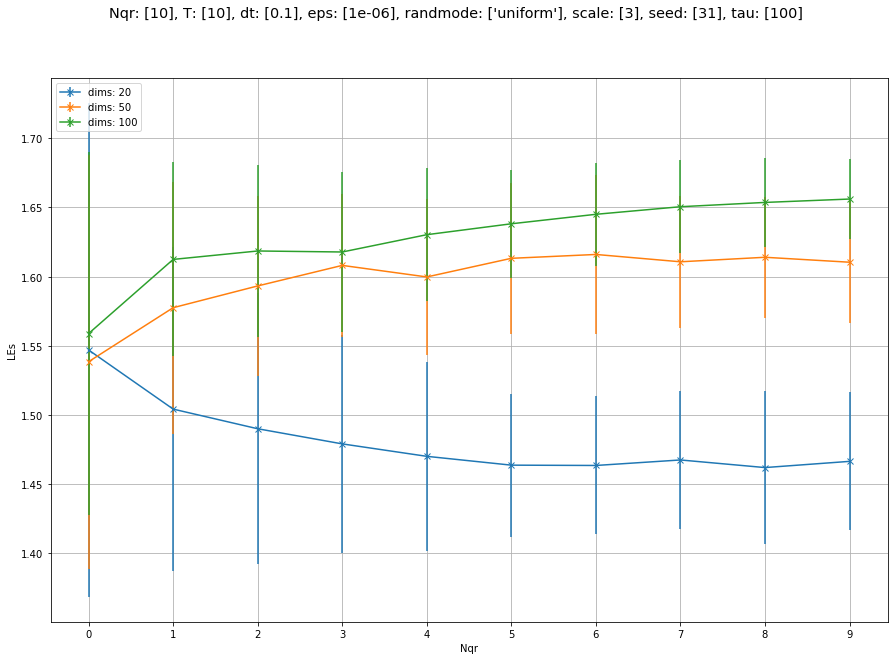

In [23]:
plot_func = simt.plot_leqr_file

zs = ["dims"]
xs = []
ys = []

# simt.plot_leqr_file kwargs
mean_axs = "ens"
show_error = True
le_index = None
ens_index = None
every_x_tick = True
subfigsize= (15, 10)

prefix="leqr"

subfigsize = (15, 10)
simt.plot_experiment(plot_func, prepath, exp_name_qr, prefix=prefix, zs=zs, xs=xs, ys=ys, subfigsize=subfigsize, mean_axs=mean_axs, show_error=show_error,
                 le_index=le_index, ens_index=ens_index, every_x_tick=every_x_tick,
                )

### Plot results qr trajectory divergence

No handles with labels found to put in legend.


lines: 1, cols: 3, rows: 1
mean sloap: 1.467


No handles with labels found to put in legend.
No handles with labels found to put in legend.


mean sloap: 1.61
mean sloap: 1.656


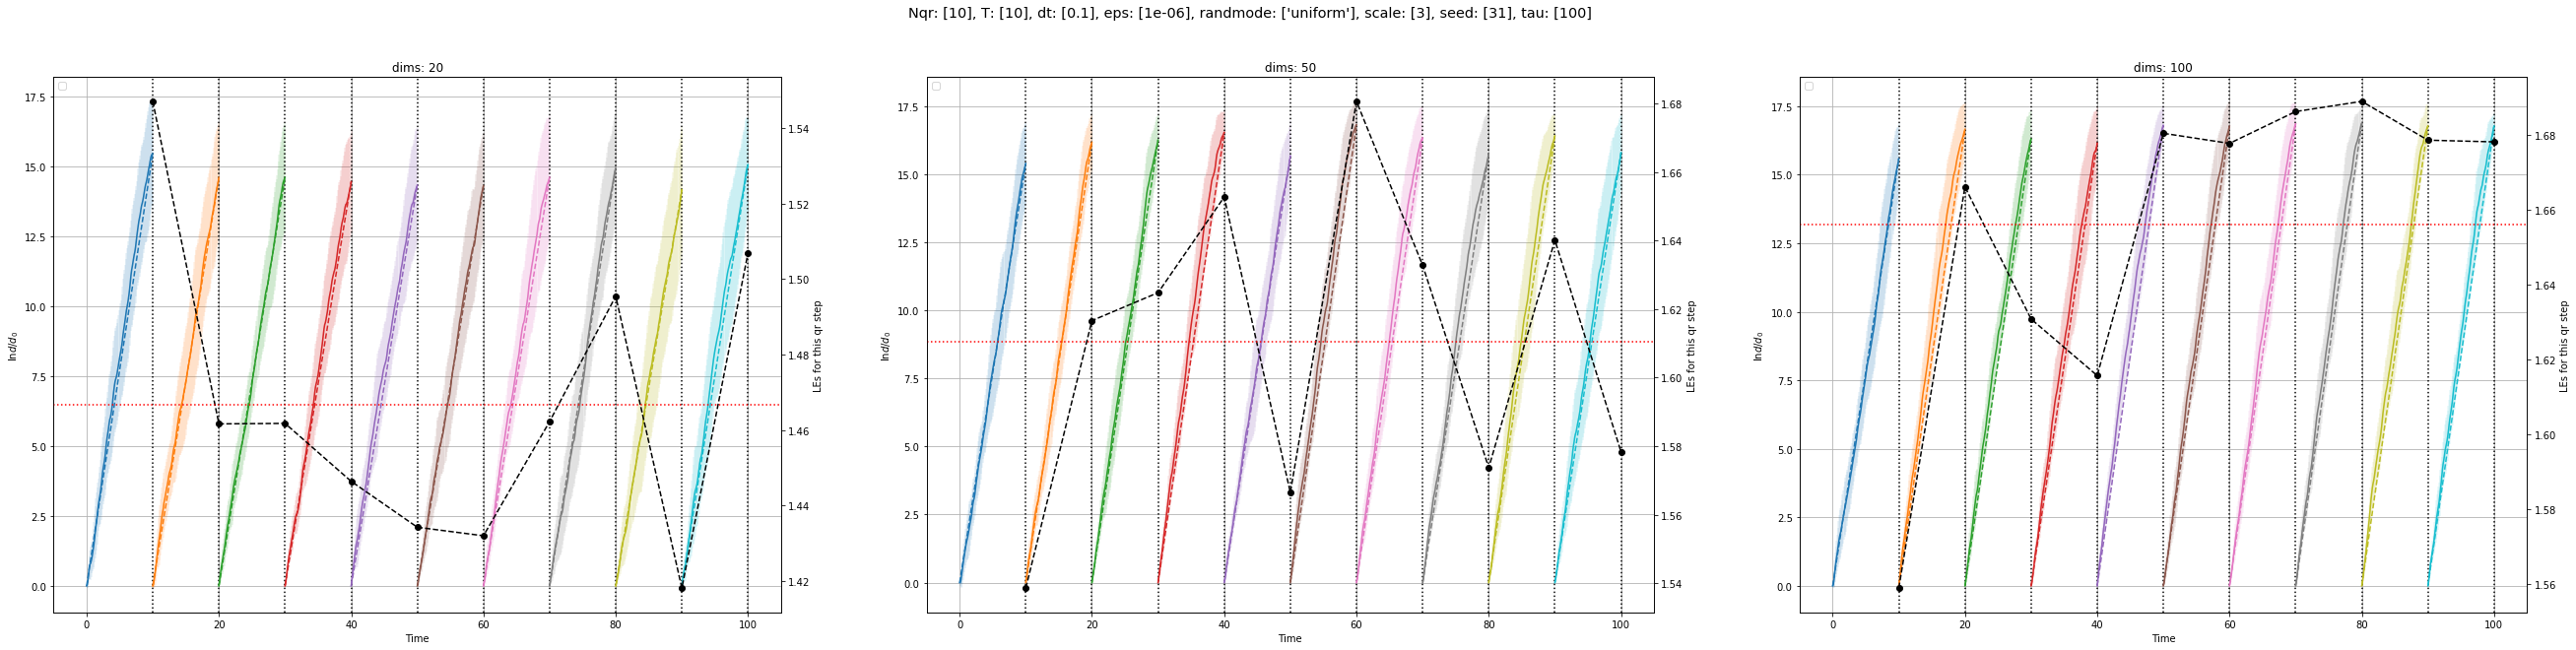

In [21]:
plot_func = simt.plot_qrdiv_file

zs = []
xs = ["dims"]
ys = []

# simt.plot_leqr_file kwargs
mean_axs = "ens"
show_error = True
le_index = None
ens_index = None

rel_dist=True
include_fit_qr=True

subfigsize = (15, 10)
prefix="qrdiv"
simt.plot_experiment(plot_func, prepath, exp_name_qr, prefix=prefix,  zs=zs, xs=xs, ys=ys,
                     subfigsize=subfigsize, mean_axs=mean_axs, show_error=show_error,
                 le_index=le_index, ens_index=ens_index, rel_dist=rel_dist, include_fit_qr=include_fit_qr
                )